# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"C:\Users\rama kant\Downloads\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

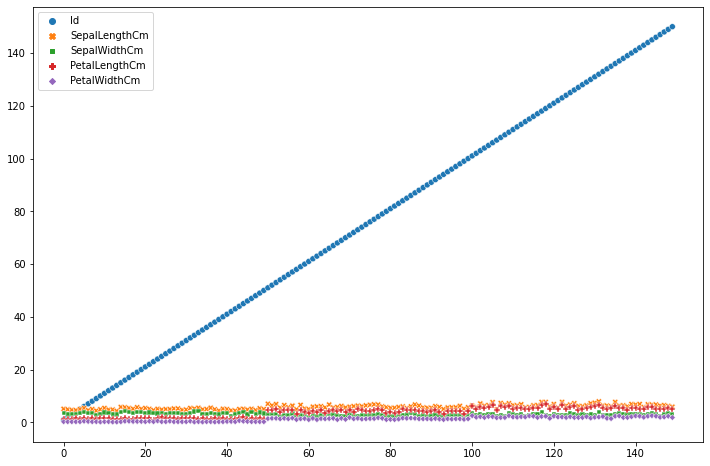

In [4]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data)


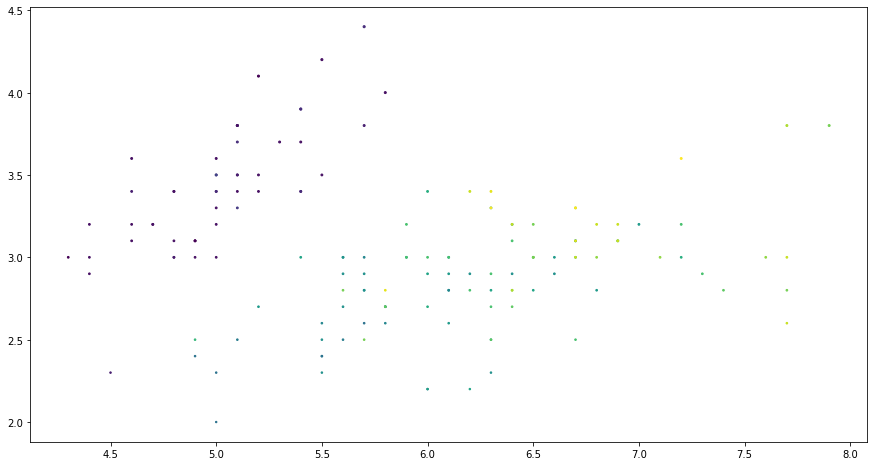

In [5]:
plt.figure(figsize=(15,8))
plt.scatter(data.SepalLengthCm,data.SepalWidthCm,data.SepalWidthCm,data.PetalWidthCm)
plt.show()

In [6]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data['Species']=data['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# elbow method k means for optimum cluster value

In [8]:
k= list(range(1,20))
sse=[]
for i in k:
    km= KMeans(n_clusters=i)
    km.fit(data)
    sse.append(km.inertia_)


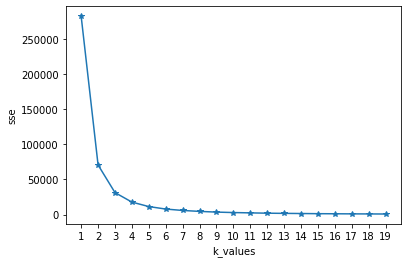

In [9]:
plt.plot(k,sse,marker='*')
plt.xticks(k)
plt.xlabel('k_values')
plt.ylabel("sse",)
plt.show()

In [10]:
km=KMeans(n_clusters=3)                     # 3 is here at bending point####
y_predict=km.fit_predict(data)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
data['cluster']=y_predict
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1


In [12]:
data.cluster.value_counts()

0    50
1    50
2    50
Name: cluster, dtype: int64

In [13]:
km.cluster_centers_

array([[ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326,   1.   ],
       [ 25.5  ,   5.006,   3.418,   1.464,   0.244,   0.   ],
       [125.5  ,   6.588,   2.974,   5.552,   2.026,   2.   ]])

In [14]:
data1=np.array(data)

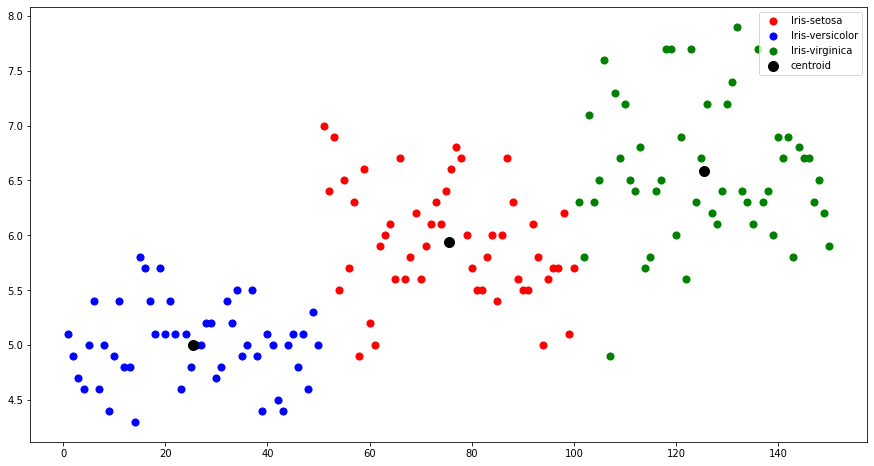

In [15]:
plt.figure(figsize= (15,8))

plt.scatter(data1[y_predict==0,0], data1[y_predict==0,1],s=50,c='red'     , label='Iris-setosa')   
plt.scatter(data1[y_predict==1,0], data1[y_predict==1,1],s=50,c='blue'     , label='Iris-versicolor')
plt.scatter(data1[y_predict==2,0], data1[y_predict==2,1],s=50,c='green'     , label='Iris-virginica')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100, c='black', label="centroid")
plt.legend()
plt.show()